In [1]:
import os
import random
import time
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

import torch
import torchvision
from torchvision.transforms import ToPILImage
from torchvision.transforms import functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

In [40]:
df = pd.read_csv('livecell_base_preprocessing_rle.csv')

In [41]:
# df = pd.read_csv('livecell_base_preprocessing.csv')
df_train = df[df['original_split']=='train']
df_val = df[df['original_split']=='val']
df_test = df[df['original_split']=='test']
# df_list = [df_train, df_val, df_test]

In [10]:
df_images = df.groupby(["image_id", "cell_type"]).agg({'annotation': 'count'}).sort_values("annotation", ascending=False).reset_index()

In [11]:
df_images.groupby("cell_type").annotation.describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
cell_type,,,,,,,,
A172,608,216,137,1,98,173,313,656
BT474,672,193,71,1,141,179,227,540
BV2,608,618,571,2,147,392,1004,3015
Huh7,672,57,19,21,44,55,67,190
MCF7,735,474,351,57,176,363,726,1522
SHSY5Y,704,382,264,1,166,304,534,1422
SKOV3,684,149,93,21,76,125,207,554
SkBr3,704,376,160,1,255,345,463,1183


<AxesSubplot:>

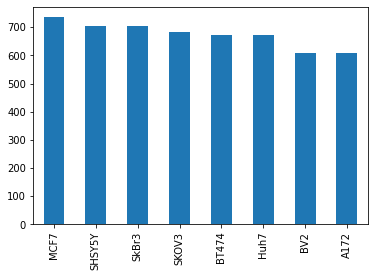

In [12]:
df_images.cell_type.value_counts().plot.bar()

In [19]:
gk = df.groupby('image_id')

<AxesSubplot:>

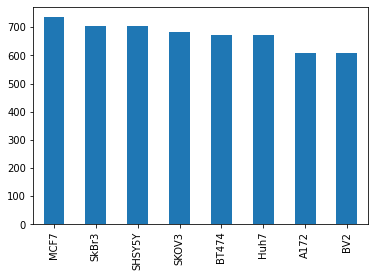

In [22]:
gk.first().cell_type.value_counts().plot.bar()

<AxesSubplot:>

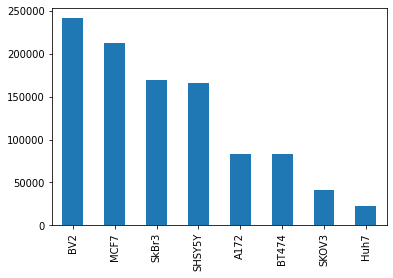

In [29]:
df_train.cell_type.value_counts().plot.bar()

<AxesSubplot:>

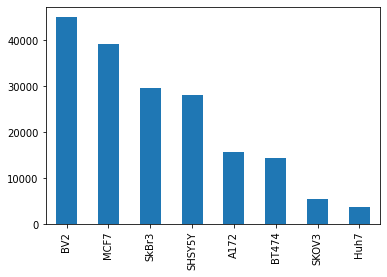

In [30]:
df_val.cell_type.value_counts().plot.bar()

<AxesSubplot:>

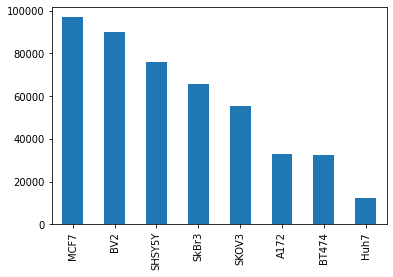

In [31]:
df_test.cell_type.value_counts().plot.bar()

In [114]:
new = df_train["bbox"].str[1:-1]

In [112]:
new

0                          286.01 287.73  19.17  20.27
1                          263.   304.9   20.45  18.44
2                          275.42 277.14  23.92  17.16
3                          246.96 280.72  20.99  54.  
4                          229.45 302.91  22.59  32.75
                              ...                     
1018571                    176.62  11.33  46.03  14.96
1018572                    168.84   0.    15.25  11.41
1018573    1.5863e+02 1.0000e-01 2.1740e+01 2.0390e+01
1018574                    491.47   0.     6.81   4.94
1018575                    686.84 458.44  17.16   9.39
Name: bbox, Length: 1018576, dtype: object

In [104]:
new = new.apply(lambda x: float(x.split()[3]) * float(x.split()[2]))

In [106]:
new.describe()

count    1.018576e+06
mean     7.883737e+02
std      1.155273e+03
min      2.199240e+01
25%      2.199295e+02
50%      3.969952e+02
75%      8.470865e+02
max      4.709922e+04
Name: bbox, dtype: float64

In [116]:
# height
new = new.apply(lambda x: float(x.split()[3]))
new.describe()

AttributeError: 'float' object has no attribute 'split'